In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import torch
from torch.nn import functional as F 
model=torch.load('/data/shhliu19/wonder/llama/7B/consolidated.00.pth')

In [2]:
def Elayer(layer):
    filters=torch.tensor([[0,1,0],[1,0,1],[0,1,0]]).float().to('cuda').reshape(1,1,3,3)
#     filters=torch.tensor([[0.707,1,0.707],[1,0,1],[0.707,1,0.707]]).float().to('cuda').reshape(1,1,3,3)
    layerF=layer.float().to('cuda')
    layerShape=layerF.shape
    layerF=layerF.reshape(1,1,*layerShape)
    elayer=F.conv2d(layerF,filters,padding=0)
    layerF=layerF.reshape(*layerShape)
    elayer=elayer.squeeze(0).squeeze(0)
    return -(elayer*layerF[1:-1,1:-1])

In [3]:
def ElayerSum(layer):
    return Elayer(layer).sum()

In [4]:
layer0wq=Elayer(model['layers.0.attention.wq.weight'])
normalLayer=torch.normal(layer0wq.mean(),layer0wq.std(),size=layer0wq.shape)

In [5]:
ElayerSum(layer0wq)

tensor(-212.6718, device='cuda:0')

In [6]:
ElayerSum(normalLayer)

tensor(-0.0503, device='cuda:0')

<Axes: >

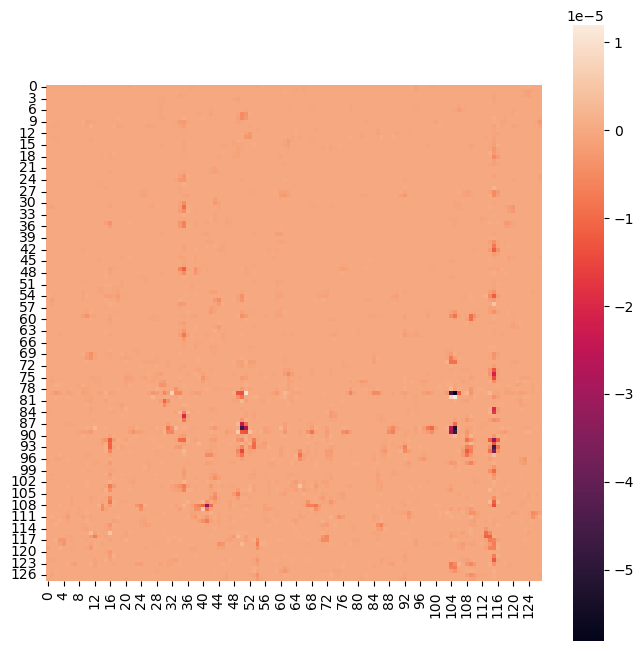

In [7]:
sns.set_context({"figure.figsize":(8,8)})
sns.heatmap(data=Elayer(layer0wq)[:128,:128].cpu(),square=True)

<Axes: >

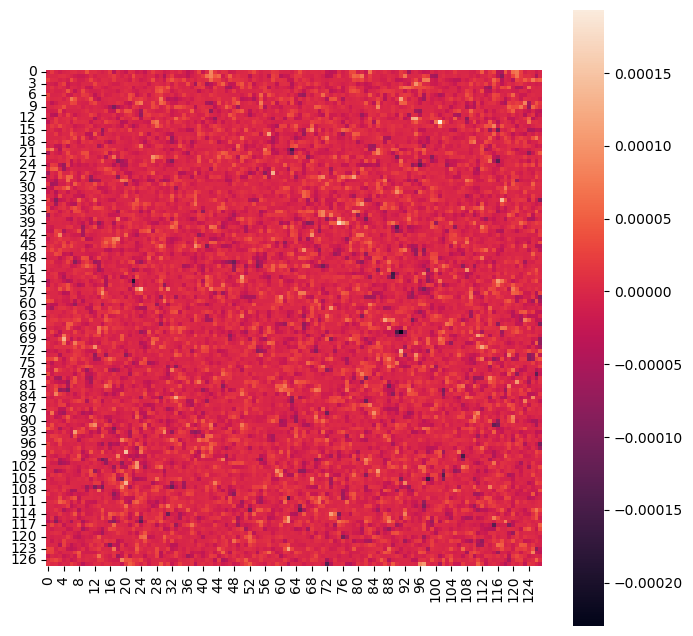

In [8]:
sns.set_context({"figure.figsize":(8,8)})
sns.heatmap(data=Elayer(normalLayer)[:128,:128].cpu(),square=True)